# Math 110B Project 2
# Yuxuan Wang 32614564

In [1]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

import numpy as np
import matplotlib.pyplot as plt

def generate_random_numbers(n, mu, sigma, dist="normal"):
    low = mu - (sigma/np.sqrt(3))
    high = mu + (sigma/np.sqrt(3))
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        return np.random.uniform(low, high, n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        


In [2]:
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")
y_test

array([ 0.14761624, -0.07790931, -0.14542883,  0.10768686, -0.06609517])

# Task 1

In [3]:
np.random.seed(42)
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")


In [4]:
print("y1 is :", y1)
print("mean of y1 is:", np.mean(y1))
print("y2 is :", y2)
print("mean of y2 is:", np.mean(y2))


y1 is : [ 9.96714153e-01  3.61735699e-01  1.14768854e+00  2.02302986e+00
  2.65846625e-01  2.65863043e-01  2.07921282e+00  1.26743473e+00
  3.05256141e-02  1.04256004e+00  3.65823072e-02  3.42702464e-02
  7.41962272e-01 -1.41328024e+00 -1.22491783e+00 -6.22875292e-02
 -5.12831120e-01  8.14247333e-01 -4.08024076e-01 -9.12303701e-01
  1.96564877e+00  2.74223700e-01  5.67528205e-01 -9.24748186e-01
 -4.43827245e-02  6.10922590e-01 -6.50993577e-01  8.75698018e-01
 -1.00638690e-01  2.08306250e-01 -1.01706612e-01  2.35227818e+00
  4.86502775e-01 -5.57710929e-01  1.32254491e+00 -7.20843650e-01
  7.08863595e-01 -1.45967012e+00 -8.28186049e-01  6.96861236e-01
  1.23846658e+00  6.71368281e-01  3.84351718e-01  1.98896304e-01
 -9.78521990e-01 -2.19844208e-01  3.93612290e-02  1.55712223e+00
  8.43618290e-01 -1.26304016e+00  8.24083969e-01  1.14917720e-01
 -1.76922000e-01  1.11167629e+00  1.53099952e+00  1.43128012e+00
 -3.39217523e-01  1.90787624e-01  8.31263431e-01  1.47554513e+00
  2.08257622e-02 

In [5]:
# Two orderings to experiment with
# Random ordering with replacement In this case, we do not choose the fixed ordering, we sample a number in  {1,2,…,n}  each time and follow the iteration.

# Random ordering without replacement In this case, we do not choose the fixed ordering, we sample an ordering without replacement from  {1,2,…,n}  and then follow the iteration.

In [6]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task1(y):
    n = len(y)
#     np.random.seed(42)
    ordering = np.random.choice(n, n, replace=True)
    history = np.zeros(n)
    x = 0
    for i in range(n):
        a = 0
        for j in range(n):
            a += (x - y[j])**2
        history[i] = (1/2)*a
        x = x - (1e-3/(i+1))*(x - y[ordering[i]])
#         x = x - (1/(i+1))*(x - y[ordering[i]])
    
    return history, x
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y):
    n = len(y)
#     np.random.seed(42)
    ordering = np.random.choice(n, n, replace = False)
    history = np.zeros(n)
    x = 0
    for i in range(n):
        a = 0
        for j in range(n):
            a += (x - y[j])**2
        history[i] = (1/2)*a
        x = x - (1e-3/(i+1))*(x - y[ordering[i]])
#         x = x - (1/(i+1))*(x - y[ordering[i]])
 
    return history, x
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    

In [7]:
[wr_history1, x] = IGD_wr_task1(y1)
x

0.0008523729141803835

In [8]:
[wr_history2, x] = IGD_wr_task1(y2)
x

0.0024974347614731772

In [9]:
[wo_history1, x] = IGD_wo_task1(y1)
x

0.0023455826261286885

In [10]:
[wo_history2, x] = IGD_wo_task1(y2)
x

0.003582133624365066

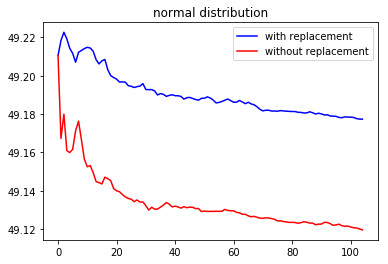

In [11]:
plt.plot(np.arange(105), wr_history1, 'b', label = 'with replacement')
plt.plot(np.arange(105), wo_history1, 'r', label = 'without replacement')
titley1 = 'normal distribution'
plt.title(titley1)
plt.legend()

plt.show()

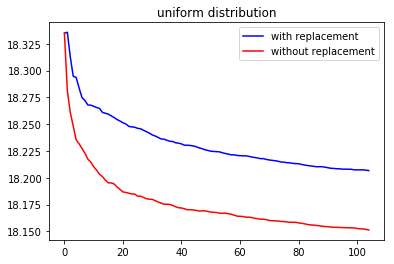

In [12]:
plt.plot(np.arange(105), wr_history2, 'b', label = 'with replacement')
plt.plot(np.arange(105), wo_history2, 'r', label = 'without replacement')
titley2 = 'uniform distribution'
plt.title(titley2)
plt.legend()

plt.show()

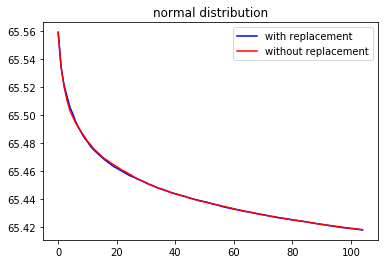

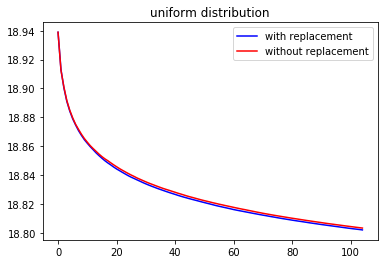

In [13]:
n = 105
test = 200
wr_historyy1s = np.zeros(n)
wo_historyy1s = np.zeros(n)
wr_historyy2s = np.zeros(n)
wo_historyy2s = np.zeros(n)

for k in range(test):
    y1 = generate_random_numbers(n, 0.5, 1.0, "normal")
    y2 = generate_random_numbers(n, 0.5, 1.0, "uniform")
    [wr_history1, x] = IGD_wr_task1(y1)
    [wo_history1, x] = IGD_wo_task1(y1)
    [wr_history2, x] = IGD_wr_task1(y2)
    [wo_history2, x] = IGD_wo_task1(y2)
    
    wr_historyy1s += wr_history1
    wo_historyy1s += wo_history1
    wr_historyy2s += wr_history2
    wo_historyy2s += wo_history2

plt.plot(np.arange(105), wr_historyy1s/test, 'b', label = 'with replacement')
plt.plot(np.arange(105), wo_historyy1s/test, 'r', label = 'without replacement')
titley2 = 'normal distribution'
plt.title(titley2)
plt.legend()

plt.show()

plt.plot(np.arange(105), wr_historyy2s/test, 'b', label = 'with replacement')
plt.plot(np.arange(105), wo_historyy2s/test, 'r', label = 'without replacement')
titley2 = 'uniform distribution'
plt.title(titley2)
plt.legend()

plt.show()

## The steps are chosen using a without-replacement sampling strategy is better since it converges to the smaple mean: 0.3711 and 0.4902 with step length 1/(k+1), for sample y1 and y2 respectively. Also, by changing the step length from 1/(k+1) to 0.001/(k+1), we can observe better from the plot that without replacement strategy has smaller and smaller objective function value during each iteration, which imples it is converging better than the with replacement strategy.
## With 200 tests and take the average, by plotting,  we can tell that the two stragegy's objection function values will overlap but without-replacement sampling strategy is better.

# Task 2

In [14]:
# IGD, the ordering is permitted to have replacement. 
#
#
beta = np.random.uniform(1,2,105)

def IGD_wr_task2(beta, y):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=True)
    np.random.seed(42)
    gamma = 0.1*min(1/beta)
    
    history = np.zeros(n)
    subsqrt = np.zeros(n)
    xstorewr = np.zeros(n+1)
    x = 0
    
    for i in range(n):
        a = 0
        for j in range(n):
            a += beta[j]*((x - y)**2)
        subsqrt[i] = a
        history[i] = (1/2)*subsqrt[i]
        x = x - gamma * beta[ordering[i]]*(x - y)
        xstorewr[i+1] = x

    return history, xstorewr, x
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task2(beta, y):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=False)
    np.random.seed(42)
    beta = np.random.uniform(1,2,n)
    gamma = 0.1*min(1/beta)
    
    history = np.zeros(n)
    subsqrt = np.zeros(n)
    xstorewo = np.zeros(n+1)
    x = 0
    
    for i in range(n):
        a = 0
        for j in range(n):
            a += beta[j]*((x - y)**2)
            
        subsqrt[i] = a
        history[i] = (1/2)*subsqrt[i]
        x = x - gamma * beta[ordering[i]]*(x - y)
        xstorewo[i+1] = x

    return history, xstorewo, x
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.


In [15]:
[wr_history2, xstorewr, x] = IGD_wr_task2(beta, 50)
x

49.97845744231676

In [16]:
xstorewr.shape

(106,)

In [17]:
[wo_history2, xstorewo, x] = IGD_wo_task2(beta, 50)
x

49.98464033492947

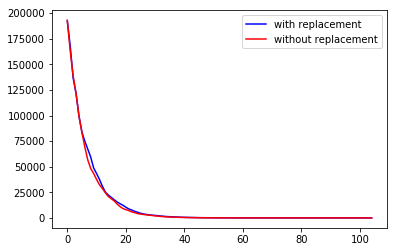

In [18]:
plt.plot(np.arange(105), wr_history2, 'b', label = 'with replacement')
plt.plot(np.arange(105), wo_history2, 'r', label = 'without replacement')

plt.legend()
plt.show()

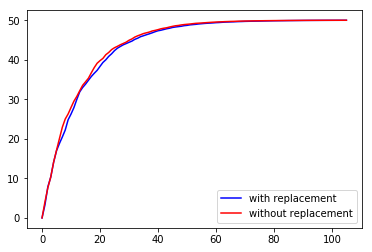

In [19]:
plt.plot(np.arange(106), xstorewr, 'b', label = 'with replacement')
plt.plot(np.arange(106), xstorewo, 'r', label = 'without replacement')

plt.legend()
plt.show()

## The steps are chosen using a without-replacement sampling strategy is better . Even though, the plot showing that two strategys objection function values for each step is nearly overlaping, we plot the x values for each iteration will find out that without-replacement sampling strategy is converging faster. Also, if we change the parameter 0.95 into 0.1, we will find that the red line, representing without-replacement strategy objection function value, is below the blue line which shows converging faster.

# Task 3

In [28]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [29]:
# We generate the problem with 200x100 matrix. rho as 0.01.
#
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [30]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task3(y, A):
    n = A.shape[0]
    
    ordering = np.random.choice(n, n, replace = True)
    x = np.zeros(A.shape[1])
    rho = 1e-3
    history = np.zeros(n)
    xstore = np.zeros([A.shape[1], n+1])
    
    for i in range(n):
        s = 0
        for j in range(n):
            a = A[j,:]
            s += (np.matmul(a, x) - y[j])**2
        history[i] = s
        v = A[ordering[i], :]
        k = rho * ((v @ x) - y[ordering[i]]) # scalar
        x = x - k * v
        xstore[:, i+1] = x
        
    return history, x, xstore
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A):
    n = A.shape[0]
    
    ordering = np.random.choice(n, n, replace = False)
    x = np.zeros(A.shape[1])
    rho = 1e-3
    history = np.zeros(n)
    xstore = np.zeros([A.shape[1], n+1])
    
    for i in range(n):
        s = 0
        for j in range(n):
            a = A[j,:]
            s += (np.matmul(a, x) - y[j])**2
        history[i] = s
        v = A[ordering[i], :]
        k = rho * ((v @ x) - y[ordering[i]]) # scalar
        x = x - k * v
        xstore[:, i+1] = x
        
    return history, x, xstore
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.


In [31]:
[wr_history3, x, xstorewr] = IGD_wr_task3(y, A)
x

array([-0.05019223, -0.02977589,  0.03235441,  0.22200256, -0.09341607,
       -0.13281703,  0.22678577,  0.03234012,  0.17061469,  0.30949653,
        0.08208573,  0.13323931,  0.07043162,  0.04823547,  0.15070822,
        0.17374349, -0.09862381,  0.11829961,  0.05809831,  0.07863961,
        0.03156411, -0.02912556,  0.26877937, -0.07838796,  0.01217622,
        0.06818137,  0.13315346,  0.04854619, -0.10049974,  0.1925628 ,
        0.28612619,  0.069769  ,  0.11919163,  0.08185966,  0.15159768,
        0.1320238 , -0.01363412,  0.05996929,  0.06394171,  0.17493484,
        0.07811583, -0.0464765 ,  0.21290254,  0.0221108 ,  0.00966347,
        0.23812823,  0.06660074,  0.05762978,  0.00608154, -0.02240305,
       -0.07276234,  0.25406478,  0.14184662,  0.07602986,  0.10996207,
        0.04238214, -0.0857632 , -0.10622945,  0.05913204,  0.03820358,
        0.1577866 ,  0.00049347,  0.11256839,  0.10186874,  0.19608544,
        0.0634032 ,  0.0136446 ,  0.03528894,  0.25494674,  0.07

In [32]:
[wo_history3, x, xstorewo] = IGD_wr_task3(y, A)
x

array([ 0.02569091,  0.08846379, -0.03793171, -0.00796436, -0.00380019,
       -0.08502828,  0.25044087,  0.17075292,  0.12038266,  0.32127709,
        0.10387372,  0.08385007,  0.08257907,  0.34673208,  0.07634335,
        0.12324177, -0.00422273, -0.00674818,  0.05864094,  0.19189433,
        0.0006194 , -0.00595929,  0.26133846,  0.17939846,  0.19300162,
        0.08044933,  0.23963347,  0.00741874,  0.02132614,  0.07633741,
        0.22180639,  0.02361793,  0.39069978,  0.03236003,  0.37327327,
        0.13469343,  0.03899399, -0.01870176,  0.07764169,  0.12932361,
        0.18281193,  0.03876609,  0.29518039,  0.05661898,  0.10148759,
        0.24488829,  0.18340334,  0.16459102,  0.10690234,  0.01409549,
        0.02992347,  0.21536144,  0.19461371,  0.07492689,  0.1579692 ,
        0.12582666,  0.01277411, -0.09561243,  0.09182921,  0.20523591,
        0.29374917, -0.0100842 ,  0.12282032, -0.04062849,  0.11155836,
        0.11973904,  0.2110222 ,  0.19340037,  0.16416778, -0.08

In [33]:
xstorewr.shape

(100, 201)

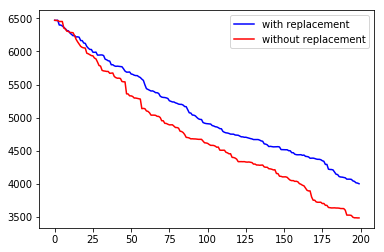

In [34]:
plt.plot(np.arange(200), wr_history3, 'b', label = 'with replacement')
plt.plot(np.arange(200), wo_history3, 'r', label = 'without replacement')
plt.legend()
plt.show()

In [35]:
from numpy import linalg as LA
normwr = np.zeros(A.shape[0]+1)
normwo = np.zeros(A.shape[0]+1)
for i in range(A.shape[0]+1):
    normwr[i] = LA.norm(xstorewr[:, i] - xstar)
    normwo[i] = LA.norm(xstorewo[:, i] - xstar)


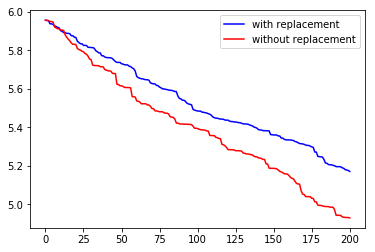

In [36]:
plt.plot(np.arange(201), normwr, 'b', label = 'with replacement')
plt.plot(np.arange(201), normwo, 'r', label = 'without replacement')
plt.legend()
plt.show()

## For multiple dimension, by observing the plot of objective function values and convergence rate for each iteration, we can still conclude that without-replacement sampling strategy is better.